# CS 6501 Project 1: Aisha Chowdary (wyw7vw)

# Loading and Reading Google Search History JSON Takeout Files

In [29]:
import pandas as pd
from datetime import datetime

import json
with open('MyActivity.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df['time'] = pd.to_datetime(df['time'], format='ISO8601', errors='coerce')


In [30]:
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour

In [31]:
search_counts = df.groupby(['date', 'hour']).size().reset_index(name='search_count')

# Convert hours from Zulu Time to Eastern Standard Time (subtract 5 hours)
search_counts['hour'] = (search_counts['hour'] - 5) % 24

pd.set_option('display.max_rows', None)

print(search_counts)

           date  hour  search_count
0    2024-11-21    11             2
1    2024-11-21    14             2
2    2024-11-21    18             2
3    2024-11-22    19             4
4    2024-11-22    22             2
5    2024-11-22     7             2
6    2024-11-22     8             4
7    2024-11-23    10             8
8    2024-11-23    11             6
9    2024-11-23    13             8
10   2024-11-23    17             3
11   2024-11-24    11             4
12   2024-11-24    13             2
13   2024-11-25    23            11
14   2024-11-25     0             1
15   2024-11-25    12             2
16   2024-11-25    13             3
17   2024-11-26     8             2
18   2024-11-27    19             2
19   2024-11-27    10             2
20   2024-11-28    22             4
21   2024-11-28     8             5
22   2024-11-28     9             3
23   2024-11-28    10             5
24   2024-11-28    12             5
25   2024-11-29    20             1
26   2024-11-29    23       

In [5]:
# Export to Excel
search_counts.to_excel('search_counts.xlsx', index=False)

# Plotting Searches on Date vs. Time Graph

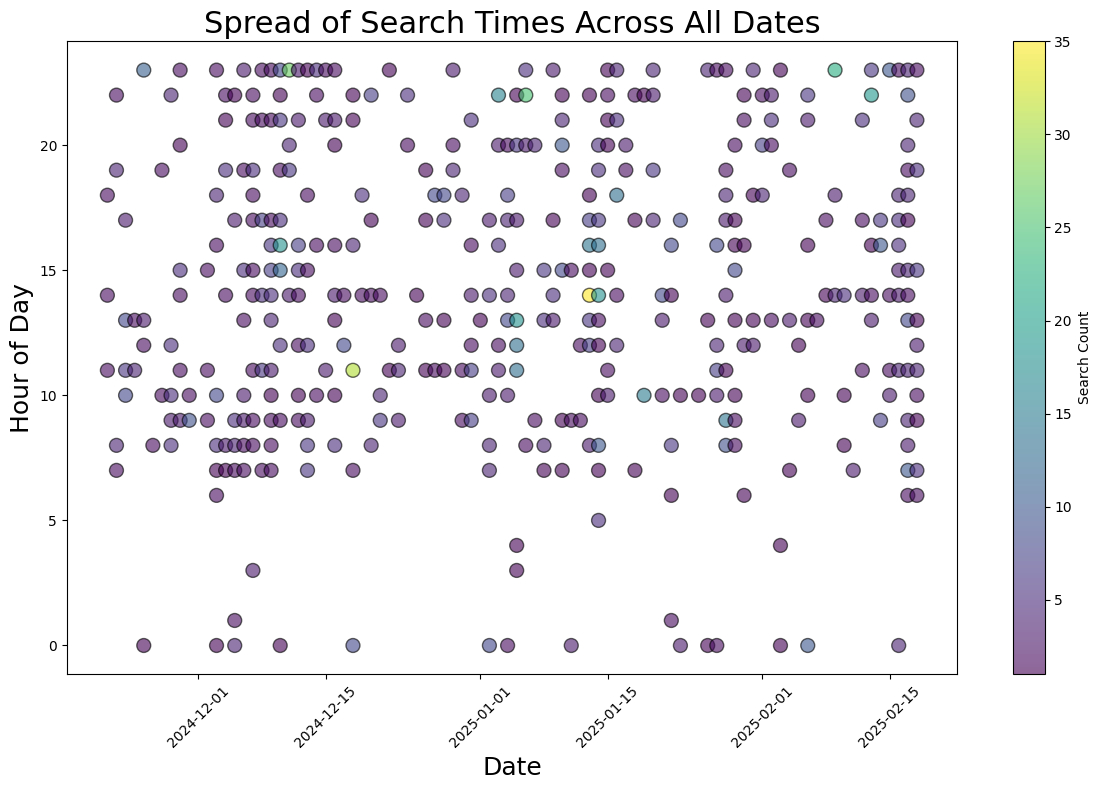

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your search_counts DataFrame looks like the one you've shown
# Make sure 'date' is in datetime format
search_counts['date'] = pd.to_datetime(search_counts['date'])

# Plotting the data with all dates
plt.figure(figsize=(12, 8))

# Scatter plot with date on the x-axis and hour on the y-axis
plt.scatter(search_counts['date'], search_counts['hour'], c=search_counts['search_count'], cmap='viridis', s=100, edgecolors='black', alpha=0.6)

# Formatting the plot
plt.title('Spread of Search Times Across All Dates',fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hour of Day', fontsize=18)
plt.colorbar(label='Search Count')  # Add a color bar to show search count intensity
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Loading and Reading Youtube Watch History JSON Takeout Files

In [35]:
import pandas as pd
from datetime import datetime

import json
with open('YoutubeMyActivity.json') as f:
    yt_data = json.load(f)

yt_df = pd.DataFrame(yt_data)

yt_df['time'] = pd.to_datetime(yt_df['time'], format='ISO8601', errors='coerce')

In [36]:
yt_df['date'] = yt_df['time'].dt.date
yt_df['hour'] = yt_df['time'].dt.hour

In [37]:
#Youtube Data Spans from 2016 - 2025, creating a smaller dataframe with data from 11/21/2024 onwards only
search_counts_yt = yt_df.groupby(['date', 'hour']).size().reset_index(name='video_count')

search_counts_yt['hour'] = (search_counts_yt['hour'] - 5) % 24

pd.set_option('display.max_rows', None)

smaller_df = search_counts_yt.iloc[738:].reset_index(drop=True)

# Display the smaller DataFrame
print(smaller_df)

           date  hour  video_count
0    2024-11-21    10            2
1    2024-11-21    14           29
2    2024-11-21    15           70
3    2024-11-21    16           40
4    2024-11-21    18           30
5    2024-11-22    19           44
6    2024-11-22    20           53
7    2024-11-22    21            2
8    2024-11-22     8            4
9    2024-11-22     9            5
10   2024-11-22    18            9
11   2024-11-23    19           17
12   2024-11-23    20           42
13   2024-11-23    21           28
14   2024-11-23    10            7
15   2024-11-23    11            4
16   2024-11-23    12           12
17   2024-11-23    13           10
18   2024-11-23    14            5
19   2024-11-23    16            6
20   2024-11-24    11            6
21   2024-11-24    16            4
22   2024-11-24    17            9
23   2024-11-25    20            3
24   2024-11-25    21           24
25   2024-11-25    10            4
26   2024-11-25    11            3
27   2024-11-25    1

In [10]:
# Export to Excel
smaller_df.to_excel('smaller_df.xlsx', index=False)

# Plotting Watch History on Date vs. Time Graph

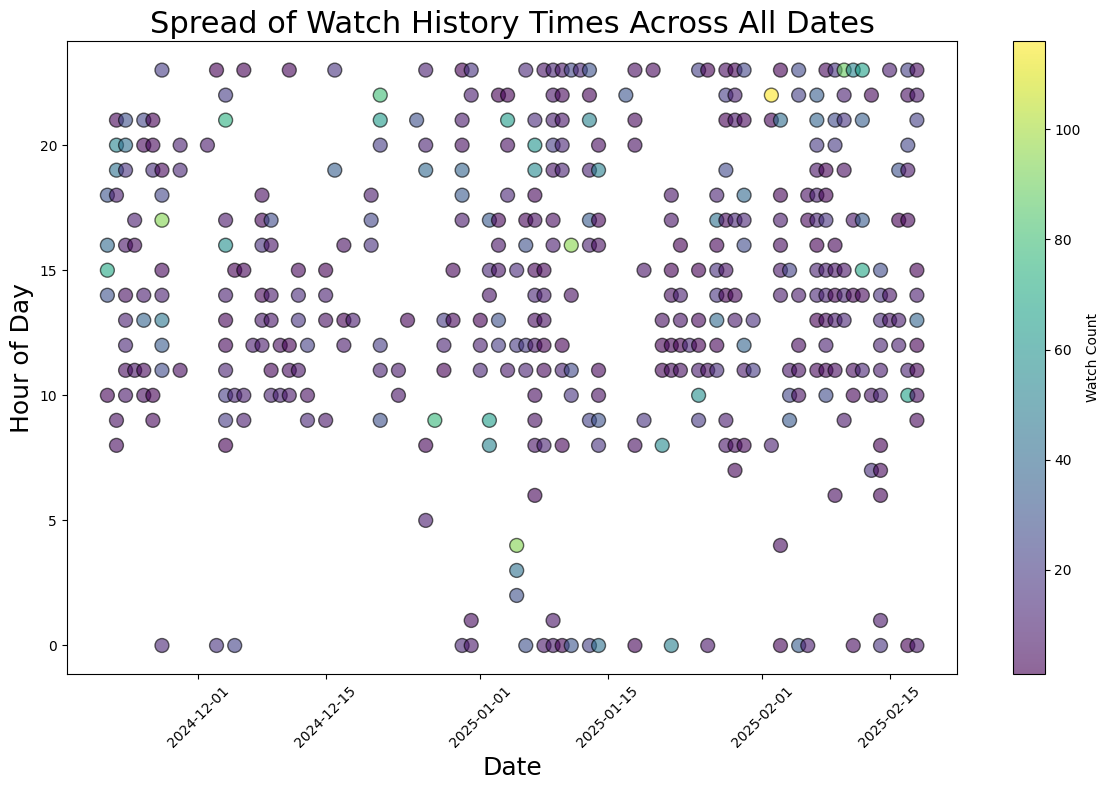

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your search_counts DataFrame looks like the one you've shown
# Make sure 'date' is in datetime format
smaller_df['date'] = pd.to_datetime(smaller_df['date'])

# Plotting the data with all dates
plt.figure(figsize=(12, 8))

# Scatter plot with date on the x-axis and hour on the y-axis
plt.scatter(smaller_df['date'], smaller_df['hour'], c=smaller_df['video_count'], cmap='viridis', s=100, edgecolors='black', alpha=0.6)

# Formatting the plot
plt.title('Spread of Watch History Times Across All Dates',fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hour of Day', fontsize=18)
plt.colorbar(label='Watch Count')  # Add a color bar to show search count intensity
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Combining Watch History and Search History

In [39]:
search_counts['date'] = pd.to_datetime(search_counts['date'])
# Merge the two DataFrames on 'date' and 'hour' using outer join to keep all rows
merged_df = pd.merge(smaller_df, search_counts, on=['date', 'hour'], how='outer')

# Combine the 'video_count' and 'search_count' into a new 'count' column
merged_df['count'] = merged_df['video_count'].fillna(0) + merged_df['search_count'].fillna(0)

# Drop the original 'video_count' and 'search_count' columns
final_df = merged_df.drop(columns=['video_count', 'search_count'])

# Display the final DataFrame
print(final_df)


          date  hour  count
0   2024-11-21    10    2.0
1   2024-11-21    11    2.0
2   2024-11-21    14   31.0
3   2024-11-21    15   70.0
4   2024-11-21    16   40.0
5   2024-11-21    18   32.0
6   2024-11-22     7    2.0
7   2024-11-22     8    8.0
8   2024-11-22     9    5.0
9   2024-11-22    18    9.0
10  2024-11-22    19   48.0
11  2024-11-22    20   53.0
12  2024-11-22    21    2.0
13  2024-11-22    22    2.0
14  2024-11-23    10   15.0
15  2024-11-23    11   10.0
16  2024-11-23    12   12.0
17  2024-11-23    13   18.0
18  2024-11-23    14    5.0
19  2024-11-23    16    6.0
20  2024-11-23    17    3.0
21  2024-11-23    19   17.0
22  2024-11-23    20   42.0
23  2024-11-23    21   28.0
24  2024-11-24    11   10.0
25  2024-11-24    13    2.0
26  2024-11-24    16    4.0
27  2024-11-24    17    9.0
28  2024-11-25     0    1.0
29  2024-11-25    10    4.0
30  2024-11-25    11    3.0
31  2024-11-25    12    2.0
32  2024-11-25    13   40.0
33  2024-11-25    14    9.0
34  2024-11-25    20

In [41]:
# Count the number of unique dates in the 'date' column
unique_dates_count = df['date'].nunique()

# Print the result
print(f'Number of unique dates: {unique_dates_count}')

Number of unique dates: 88


In [13]:
# Export to Excel
final_df.to_excel('final_df.xlsx', index=False)

# Plotting Combined Watch History and Search History on Date vs. Time Graph

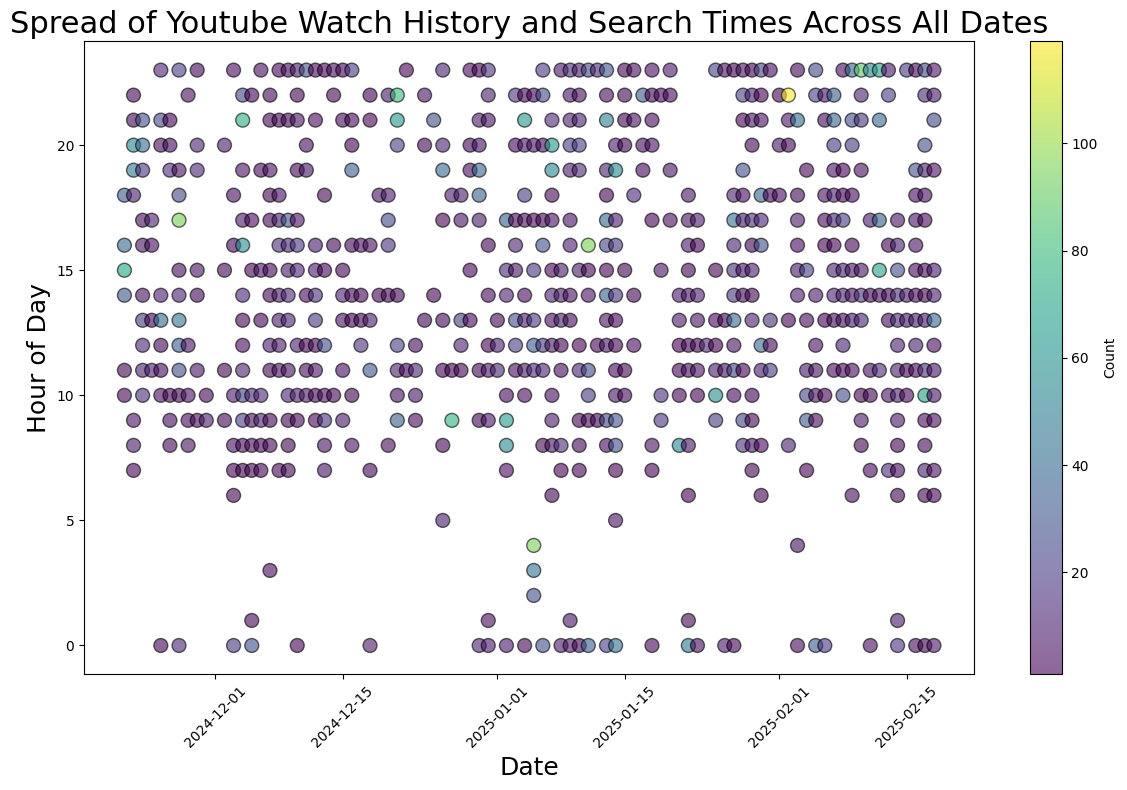

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your search_counts DataFrame looks like the one you've shown
# Make sure 'date' is in datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

# Plotting the data with all dates
plt.figure(figsize=(12, 8))

# Scatter plot with date on the x-axis and hour on the y-axis
plt.scatter(final_df['date'], final_df['hour'], c=final_df['count'], cmap='viridis', s=100, edgecolors='black', alpha=0.6)

# Formatting the plot
plt.title('Spread of Youtube Watch History and Search Times Across All Dates',fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hour of Day', fontsize=18)
plt.colorbar(label='Count')  # Add a color bar to show search count intensity
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


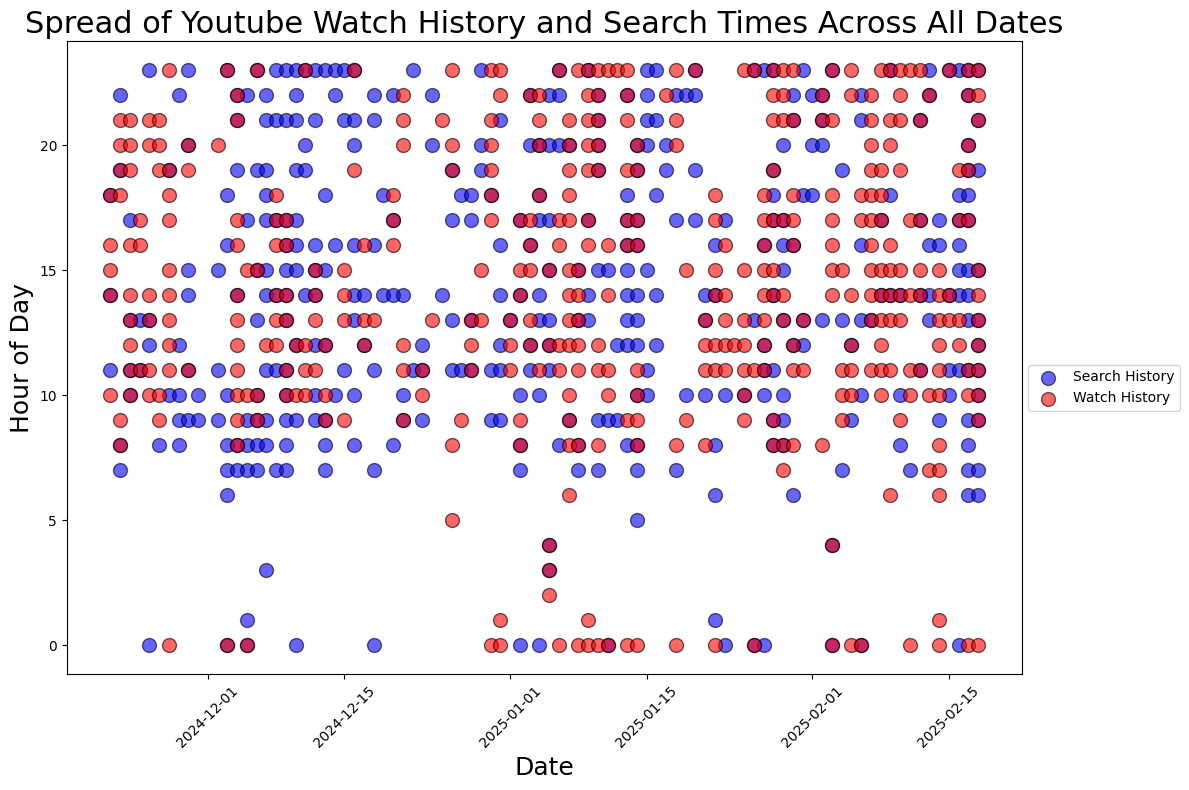

In [43]:
# Rename the column 'video_count' to 'count'
smaller_df.rename(columns={'video_count': 'count'}, inplace=True)

search_counts.rename(columns={'search_count': 'count'}, inplace=True)

import matplotlib.pyplot as plt

# Plotting the data with both datasets
plt.figure(figsize=(12, 8))

# Scatter plot for 'search_counts' dataset
plt.scatter(search_counts['date'], search_counts['hour'], c='blue', s=100, edgecolors='black', alpha=0.6, label='Search History')

# Scatter plot for 'smaller_df' dataset
plt.scatter(smaller_df['date'], smaller_df['hour'], c='red', s=100, edgecolors='black', alpha=0.6, label='Watch History')

# Formatting the plot
plt.title('Spread of Youtube Watch History and Search Times Across All Dates',fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hour of Day', fontsize=18)

# Add a legend to differentiate between the two datasets
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


# Calculating Sleep Window based on Inactivity

In [13]:
# Sort the dataframe by date and hour
df = final_df.sort_values(by=['date', 'hour'])

# Initialize a list to store inactivity periods
inactivity_periods = []

# Iterate over the DataFrame and calculate inactivity between days
for i in range(1, len(df)):
    prev_row = df.iloc[i - 1]
    curr_row = df.iloc[i]

    # Check if we are crossing into a new day
    if curr_row['date'] != prev_row['date']:  # Moving to the next day
        inactivity_start = pd.Timestamp(year=prev_row['date'].year, month=prev_row['date'].month,
                                        day=prev_row['date'].day, hour=prev_row['hour'])

        # Check if the current row's end hour is 0, 1, or 2 (indicating sleep)
        if curr_row['hour'] in [0, 1, 2]:
            # Treat the current row's hour as the sleep start hour and search for wake-up time
            sleep_start = pd.Timestamp(year=curr_row['date'].year, month=curr_row['date'].month,
                                       day=curr_row['date'].day, hour=curr_row['hour'])

            # Search for the next activity after sleep
            for j in range(i + 1, len(df)):
                next_row = df.iloc[j]
                if next_row['date'] == curr_row['date'] and next_row['hour'] > curr_row['hour']:
                    wake_time = pd.Timestamp(year=next_row['date'].year, month=next_row['date'].month,
                                              day=next_row['date'].day, hour=next_row['hour'])
                    inactivity_duration = (wake_time - sleep_start).total_seconds() / 3600
                    inactivity_periods.append({
                        'start_date': curr_row['date'],
                        'end_date': next_row['date'],
                        'start_hour': curr_row['hour'],
                        'end_hour': next_row['hour'],
                        'inactivity_hours': inactivity_duration
                    })
                    break
        else:
            inactivity_end = pd.Timestamp(year=curr_row['date'].year, month=curr_row['date'].month,
                                          day=curr_row['date'].day, hour=curr_row['hour'])
            inactivity_duration = (inactivity_end - inactivity_start).total_seconds() / 3600
            inactivity_periods.append({
                'start_date': prev_row['date'],
                'end_date': curr_row['date'],
                'start_hour': prev_row['hour'],
                'end_hour': curr_row['hour'],
                'inactivity_hours': inactivity_duration
            })

# Convert the inactivity periods to a DataFrame
inactivity_df = pd.DataFrame(inactivity_periods)

# Display the inactivity periods
print(inactivity_df)


   start_date   end_date  start_hour  end_hour  inactivity_hours
0  2024-11-21 2024-11-22          18         7              13.0
1  2024-11-22 2024-11-23          22        10              12.0
2  2024-11-23 2024-11-24          21        11              14.0
3  2024-11-25 2024-11-25           0        10              10.0
4  2024-11-25 2024-11-26          23         8               9.0
5  2024-11-27 2024-11-27           0        10              10.0
6  2024-11-27 2024-11-28          23         8               9.0
7  2024-11-28 2024-11-29          22         9              11.0
8  2024-11-29 2024-11-30          23         9              10.0
9  2024-11-30 2024-12-02          10         9              47.0
10 2024-12-03 2024-12-03           0         6               6.0
11 2024-12-03 2024-12-04          23         7               8.0
12 2024-12-05 2024-12-05           0         1               1.0
13 2024-12-05 2024-12-06          22         7               9.0
14 2024-12-06 2024-12-07 

In [44]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
inactivity_df = pd.read_excel('/content/inactivity_df_edited.xlsx')


In [45]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test between start_hour and end_hour
stat, p_value = mannwhitneyu(inactivity_df['start_hour'], inactivity_df['end_hour'])

print(f'Mann-Whitney U statistic: {stat}, p-value: {p_value}')


Mann-Whitney U statistic: 5903.0, p-value: 1.1398670502223015e-09


In [46]:
from scipy.stats import spearmanr

# Spearman's rank correlation
stat, p_value = spearmanr(inactivity_df['start_hour'], inactivity_df['end_hour'])

print(f'Spearman correlation coefficient: {stat}, p-value: {p_value}')


Spearman correlation coefficient: -0.3075891701792057, p-value: 0.003554468516603051


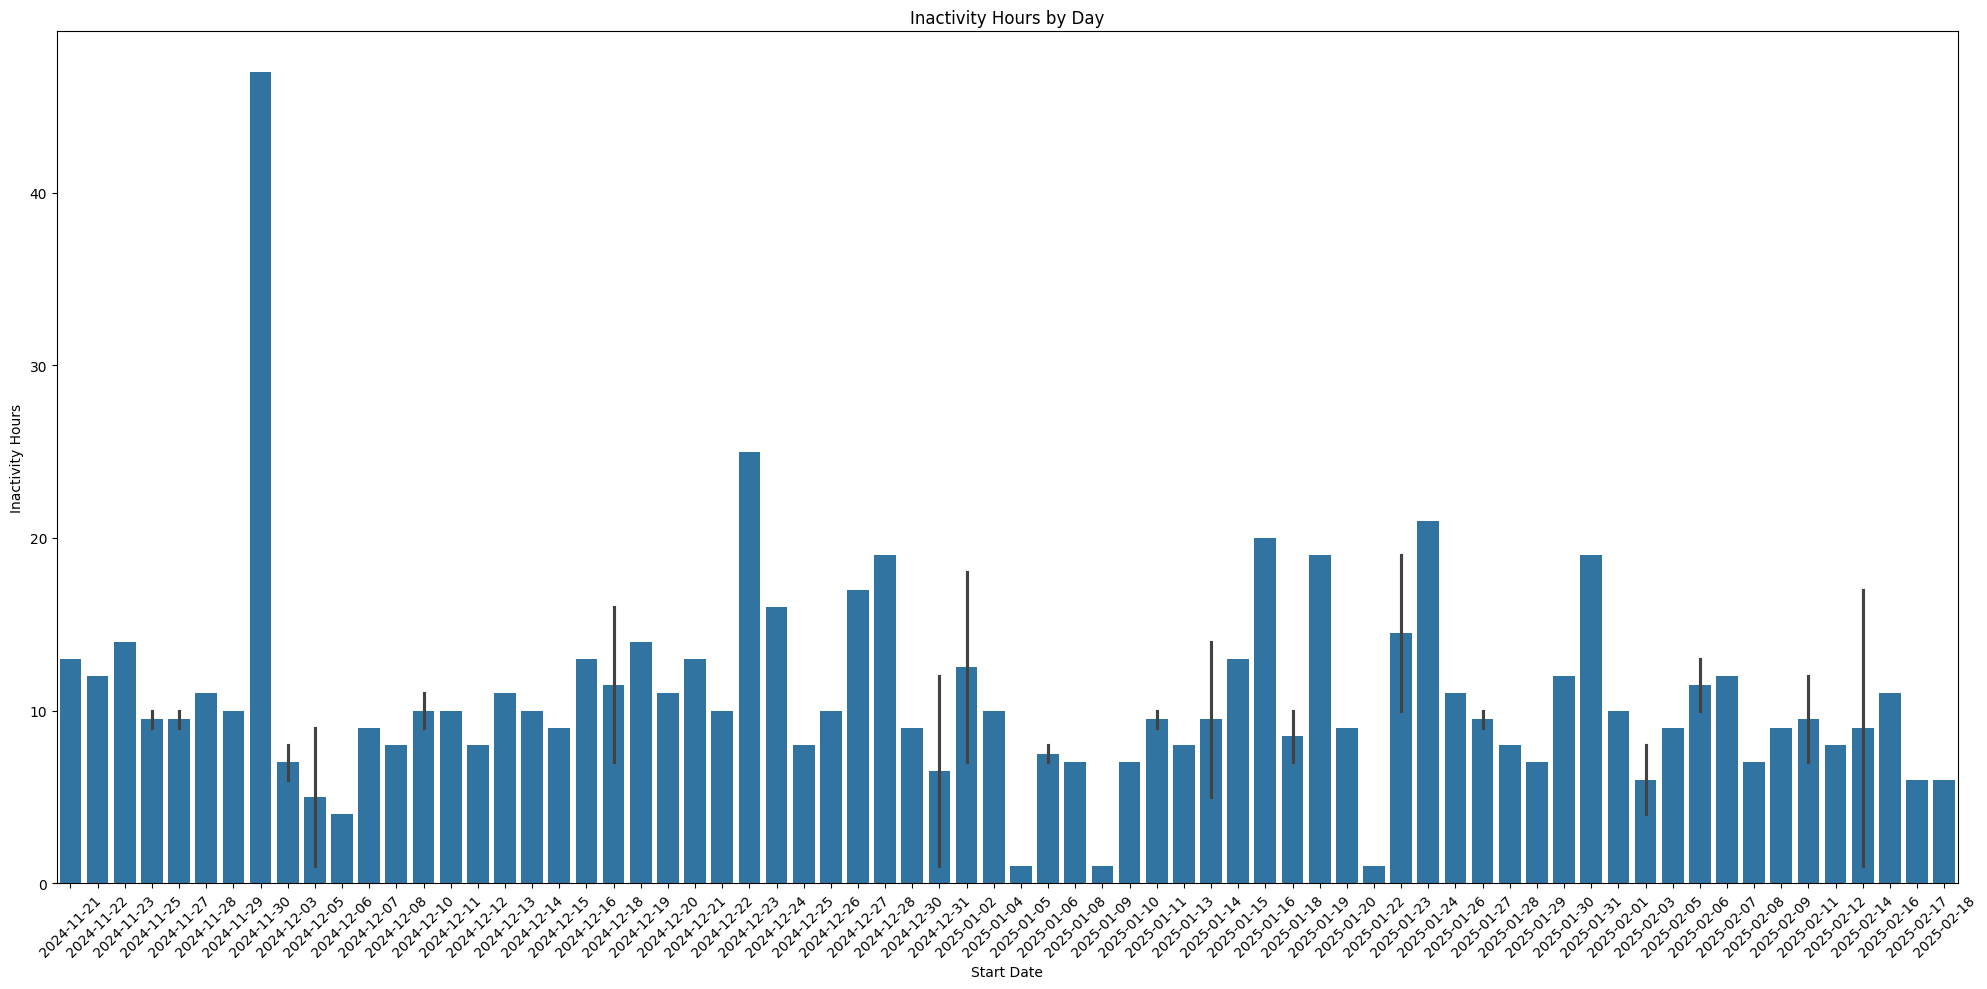

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'start_date' to datetime
inactivity_df['start_date'] = pd.to_datetime(inactivity_df['start_date'])

# Plotting the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='start_date', y='inactivity_hours', data=inactivity_df)
plt.title('Inactivity Hours by Day')
plt.xlabel('Start Date')
plt.ylabel('Inactivity Hours')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()
